<a href="https://colab.research.google.com/github/pedrofranke/E-commerce-Olist/blob/main/ETL/First_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [997]:
file2 = '/content/drive/MyDrive/Olist - Personal Project/Datasets/Olist_Funnel_marketing.zip'
file1 = '/content/drive/MyDrive/Olist - Personal Project/Datasets/e-comerce_Olist_dataset.zip'

In [998]:
!pip install unidecode

In [1122]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import unidecode
import re
from textblob import TextBlob

In [1000]:
with zipfile.ZipFile(file1, 'r') as zip_ref:
    file_names = zip_ref.namelist()

    for file_name in file_names:
        print(file_name)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [1001]:
with zipfile.ZipFile(file2, 'r') as zip_ref:
    file_names = zip_ref.namelist()

    for file_name in file_names:
        print(file_name)

olist_closed_deals_dataset.csv
olist_marketing_qualified_leads_dataset.csv


In [1002]:
dataframes = {}

with zipfile.ZipFile(file1, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                file_name = file_name.replace('olist_','').replace('.csv','').replace('_dataset','')
                dataframes.update({file_name:df})

In [1003]:
with zipfile.ZipFile(file2, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                file_name = file_name.replace('olist_','').replace('.csv','').replace('_dataset','')
                dataframes.update({file_name:df})

In [1004]:
dataframes.keys()

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'product_category_name_translation', 'closed_deals', 'marketing_qualified_leads'])

In [1005]:
dataframes['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1006]:
dataframes['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1007]:
dataframes['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1008]:
dataframes['products'] = dataframes['products'].merge(dataframes['product_category_name_translation'],how='left',on='product_category_name')
dataframes['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [1009]:
dataframes['products'].isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [1010]:
dataframes['products'].drop(columns='product_category_name',inplace=True)

In [1011]:
dataframes['products'].drop(columns=['product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_photos_qty','product_name_lenght','product_description_lenght'],inplace=True)

In [1012]:
df_products = dataframes['products']

In [1013]:
df_products.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [1014]:
del dataframes['products']

In [1015]:
dataframes.keys()

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'sellers', 'product_category_name_translation', 'closed_deals', 'marketing_qualified_leads'])

In [1016]:
del dataframes['marketing_qualified_leads']

In [1017]:
del dataframes['closed_deals']

In [1018]:
del dataframes['product_category_name_translation']

In [1019]:
dataframes.keys()

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'sellers'])

In [1020]:
df_products[df_products.duplicated()]

,product_id,product_category_name_english


In [1021]:
dataframes['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1022]:
df_customers = dataframes['customers']
del dataframes['customers']

In [1023]:
dataframes['geolocation'][dataframes['geolocation'].duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [1024]:
dataframes['geolocation'].drop_duplicates(inplace=True)

In [1025]:
dataframes['geolocation'].shape

(738332, 5)

In [1026]:
df_location = dataframes['geolocation']
del dataframes['geolocation']

In [1027]:
df_location.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_state'],inplace=True)

In [1028]:
duplicated_still = df_location[df_location.duplicated(subset=['geolocation_zip_code_prefix'])].geolocation_zip_code_prefix.tolist()

In [1029]:
df_location.shape

(19023, 5)

In [1030]:
def normalize_text(text):
  text = unidecode.unidecode(text)
  text = re.sub(r'[?]', '', text)
  text = re.sub(r'[-]', '', text)
  text = re.sub(r'[\']', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.title()
  return text

df_location['geolocation_city'] = df_location['geolocation_city'].apply(normalize_text)

In [1031]:
df_location.geolocation_city.unique().shape

(5772,)

In [1032]:
zip = 80630
df_customers[df_customers['customer_zip_code_prefix']==zip]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
4014,edd31c1519304643775736e643962b95,c89c7a08ac824694af0071fb70f4658d,80630,curitiba,PR
24535,866945c325644a98b1356b2b50663c05,d7c46dd9b81066e7f37c294108188c8b,80630,curitiba,PR
25145,2995f8ff3dd359e487a35225923d8ca1,c4bcf5edf1465db8a5400f8d4dd601a2,80630,curitiba,PR
30945,950863681cb2112651ef0782da4e689d,11cb11ff52cc1e191282a0a3c1e03aa3,80630,curitiba,PR
33199,feef9d2ebd0024cbb17471825fedfa6a,334ccf827601f338d13820e17b3bfb77,80630,curitiba,PR
42858,a2d6e6b9e568d043e74f9f63655869c0,ed46625f931d5a320538b7d1fac83fc6,80630,curitiba,PR
45269,5cc200d2334981b997f3ce341c6c91be,018e7e423aa73a3d7183d8c7c7a7c50d,80630,curitiba,PR
48516,23c9a4af50b6e7ca6d5843acb4632f71,3e3a2579dd1f91141d907f3355ae466c,80630,curitiba,PR
53879,f122107bba8fe14e1ef0304dc14b99ab,effecf2e702b13058b6ca07a0a649691,80630,curitiba,PR
62160,9344b423626861add3fef32cc25a52b9,76f13a5e178d73e1fce1f06a48e84143,80630,curitiba,PR


In [1033]:
dataframes['sellers'][dataframes['sellers']['seller_zip_code_prefix'] == zip]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [1034]:
df_location[df_location['geolocation_zip_code_prefix'].isin(duplicated_still)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
21728,2116,-23.522700,-46.587546,Sao Paulo,SP
22261,2116,-23.515978,-46.582170,Sao Paulo,RN
71032,4011,-23.577404,-46.641657,Sao Paulo,SP
72852,4011,-23.578707,-46.645779,Sao Paulo,AC
430342,21550,-22.855425,-43.367089,Rio De Janeiro,RJ
430999,21550,-22.857861,-43.352613,Rio De Janeiro,AC
459234,23056,-22.916763,-43.615464,Rio De Janeiro,RJ
460406,23056,-22.919164,-43.611097,Rio De Janeiro,AC
792362,72915,-15.734161,-48.268761,Aguas Lindas De Goias,GO
792394,72915,-12.408760,-46.428287,Taguatinga,DF


In [1035]:
df_location.drop([22261,72852,430999,460406,792394,825882,840047,847700],inplace=True)

In [1036]:
dataframes.keys()

dict_keys(['order_items', 'order_payments', 'order_reviews', 'orders', 'sellers'])

In [1037]:
print(dataframes['sellers'].duplicated().sum())
print(dataframes['sellers'].isna().sum())

0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [1038]:
df_sellers = dataframes['sellers']
del dataframes['sellers']

In [1039]:
df_sellers = df_sellers.drop(columns=['seller_state','seller_city']).merge(df_location,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left').drop(columns='geolocation_zip_code_prefix')

In [1040]:
df_sellers.columns = [x.replace('geolocation','seller') for x in df_sellers.columns.tolist()]
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641,Mogiguacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618,Braganca Paulista,SP


In [1041]:
df_customers = df_customers.drop(columns=['customer_city','customer_state']).merge(df_location,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left').drop(columns='geolocation_zip_code_prefix')

df_customers.columns = [x.replace('geolocation','customer') for x in df_customers.columns.tolist()]
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.726853,-46.545746,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.527788,-46.660310,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,Campinas,SP


In [1042]:
dataframes.keys()

dict_keys(['order_items', 'order_payments', 'order_reviews', 'orders'])

In [1043]:
dataframes['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1044]:
dataframes['order_items'] = dataframes['order_items'].merge(df_products,on='product_id',how='left')
del df_products
dataframes['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [1045]:
df_orderitems = dataframes['order_items']
del dataframes['order_items']
dataframes['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1046]:
dataframes['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1047]:
dataframes['order_payments'][dataframes['order_payments'].duplicated(subset='order_id')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [1048]:
df_payment = dataframes['order_payments']
del dataframes['order_payments']
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1049]:
df_payment.sort_values(by='payment_sequential',ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26
39111,fa65dad1b0e818e3ccc5cb0e39231352,28,voucher,1,29.05
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
79587,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27
...,...,...,...,...,...
35372,329954a78d93c0af4e24aad8677ba9bb,1,credit_card,1,83.41
35371,73130e7702a070351d67c7859ed9e12a,1,credit_card,2,60.43
35370,fcdd373db44c238886a0ecf5ec332b95,1,credit_card,4,235.48
35369,62529dde2b3d81415417822b4bc91581,1,credit_card,5,51.04


In [1050]:
df_payment.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [1051]:
order_totals = df_payment.groupby('order_id')['payment_value'].sum().reset_index()

df_payment = pd.merge(df_payment, order_totals, on='order_id', suffixes=('', '_total'))

payment_percentages = pd.pivot_table(df_payment, index='order_id', columns='payment_type', values='payment_value', aggfunc='sum', fill_value=0)
payment_percentages = payment_percentages.div(payment_percentages.sum(axis=1), axis=0).reset_index()

payment_percentages.columns.name = None
payment_percentages.rename(columns={col: f"{col}_payment" for col in payment_percentages.columns[1:]}, inplace=True)

df_payment = pd.merge(df_payment, payment_percentages, on='order_id')

df_payment.rename(columns={'payment_value_total': 'order_value'}, inplace=True)
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_value,boleto_payment,credit_card_payment,debit_card_payment,not_defined_payment,voucher_payment
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,99.33,0.0,1.0,0.0,0.0,0.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,24.39,0.0,1.0,0.0,0.0,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,65.71,0.0,1.0,0.0,0.0,0.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,107.78,0.0,1.0,0.0,0.0,0.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,128.45,0.0,1.0,0.0,0.0,0.0


In [1052]:
df_payment.drop(columns=['payment_value','payment_type','payment_sequential'],inplace=True)
df_payment.duplicated(subset='order_id').sum()

4446

In [1053]:
df_payment.drop_duplicates(subset='order_id',inplace=True)

In [1054]:
dataframes['orders'][dataframes['orders'].duplicated(subset='order_id')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [1055]:
dataframes['orders'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1056]:
df_order_header = dataframes['orders']
del dataframes['orders']
df_order_header.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1057]:
print(df_order_header.shape)
df_order_header = df_order_header.merge(df_payment,on='order_id',how='left')
print(df_order_header.shape)

(99441, 8)
(99441, 15)


In [1058]:
dataframes.keys()

dict_keys(['order_reviews'])

In [1059]:
dataframes['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1060]:
dataframes['order_reviews'].drop_duplicates(subset='order_id',inplace=True)

In [1061]:
print(df_order_header.shape)
df_order_header = df_order_header.merge(dataframes['order_reviews'],on='order_id',how='left')
print(df_order_header.shape)

(99441, 15)
(99441, 21)


In [1062]:
df_order_header.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,order_value,...,credit_card_payment,debit_card_payment,not_defined_payment,voucher_payment,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,38.71,...,0.468096,0.0,0.0,0.531904,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,141.46,...,0.000000,0.0,0.0,0.000000,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3.0,179.12,...,1.000000,0.0,0.0,0.000000,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,72.20,...,1.000000,0.0,0.0,0.000000,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,28.62,...,1.000000,0.0,0.0,0.000000,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [1063]:
df_order_header.drop(columns=['review_creation_date','review_answer_timestamp','review_comment_title','review_id','payment_installments'],inplace=True)
df_order_header.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value', 'boleto_payment', 'credit_card_payment',
       'debit_card_payment', 'not_defined_payment', 'voucher_payment',
       'review_score', 'review_comment_message'],
      dtype='object')

In [1064]:
del dataframes['order_reviews']

In [1065]:
del df_payment

Until now i got the following dataframes:<br>
df_order_header:    <br>
df_orderitems:    <br>
df_customers:    <br>
df_sellers:    <br>


In [1066]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.726853,-46.545746,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.527788,-46.660310,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,Campinas,SP


In [1067]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641,Mogiguacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618,Braganca Paulista,SP


In [1068]:
df_orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories


In [1069]:
df_orderitems.duplicated(subset='order_id').sum()

13984

In [1070]:
df_orderitems.duplicated(subset=['order_id','seller_id']).sum()

12640

In [1071]:
df_order_header.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_value,boleto_payment,credit_card_payment,debit_card_payment,not_defined_payment,voucher_payment,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,0.0,0.468096,0.0,0.0,0.531904,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,1.0,0.000000,0.0,0.0,0.000000,4.0,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,0.0,1.000000,0.0,0.0,0.000000,5.0,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,0.0,1.000000,0.0,0.0,0.000000,5.0,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,0.0,1.000000,0.0,0.0,0.000000,5.0,NaN


In [1072]:
df_unified = df_order_header.merge(df_orderitems,on='order_id',how='left')
df_unified = df_unified.merge(df_sellers,on='seller_id',how='left')
df_unified = df_unified.merge(df_customers,on='customer_id',how='left')
df_unified.shape

(113425, 34)

In [1073]:
df_unified.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_value,boleto_payment,...,seller_lat,seller_lng,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,0.0,...,-23.680114,-46.452454,Maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,-23.574809,-46.587471,Sao Paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,1.0,...,-19.810119,-43.984727,Belo Horizonte,MG,af07308b275d755c9edb36a90c618231,47813,-12.169860,-44.988369,Barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,0.0,...,-21.362358,-48.232976,Guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,-16.746337,-48.514624,Vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,0.0,...,-19.840168,-43.923299,Belo Horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,-5.767733,-35.275467,Sao Goncalo Do Amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,0.0,...,-23.551707,-46.260979,Mogi Das Cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,-23.675037,-46.524784,Santo Andre,SP


In [1074]:
df_unified.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value', 'boleto_payment', 'credit_card_payment',
       'debit_card_payment', 'not_defined_payment', 'voucher_payment',
       'review_score', 'review_comment_message', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lng', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lng',
       'customer_city', 'customer_state'],
      dtype='object')

In [1075]:
df_unified.duplicated().sum()

0

In [1076]:
df_unified.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1968
order_delivered_customer_date     3229
order_estimated_delivery_date        0
order_value                          3
boleto_payment                       6
credit_card_payment                  6
debit_card_payment                   6
not_defined_payment                  6
voucher_payment                      6
review_score                       961
review_comment_message           65497
order_item_id                      775
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
product_category_name_english     2402
seller_zip_code_prefix             775
seller_lat                        1028
seller_lng               

In [1077]:
time_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
             'order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']

df_unified[time_cols] = df_unified[time_cols].apply(pd.to_datetime)

In [1078]:
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_value                    113422 non-null  float64       
 9   boleto_payment                 113419 non-null  float64       
 10  credit_card_payment            113419 non-null  float64       
 11  

In [1079]:
merged_df = df_unified[['customer_unique_id','order_purchase_timestamp',"order_id",'order_value']]
merged_df.isna().sum()


customer_unique_id          0
order_purchase_timestamp    0
order_id                    0
order_value                 3
dtype: int64

In [1080]:
merged_df.dropna(inplace=True)

<ipython-input-1080-207e89a69f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.dropna(inplace=True)


In [1081]:
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-10-19 17:30:18')

In [1082]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
96091,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
96092,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
96093,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [1083]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,162
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,165
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,587
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,371
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,338
...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,497
96091,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,312
96092,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,619
96093,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,170


In [1084]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,1
96091,fffea47cd6d3cc0a88bd621562a9d061,1
96092,ffff371b4d645b6ecea244b27531430a,1
96093,ffff5962728ec6157033ef9805bacc48,1


In [1085]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['order_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [1086]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,162,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,165,1,27.19
2,0000f46a3911fa3c0805444483337064,587,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,338,1,196.89


In [1087]:
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,96095.0,289.730756,153.407846,2.0,165.00,270.00,399.000,774.00
Frequency,96095.0,1.034809,0.214385,1.0,1.00,1.00,1.000,17.00
Monetary,96095.0,213.025929,640.920050,0.0,63.99,113.15,202.735,109312.64


<ipython-input-1088-86eaf08a2804>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
<ipython-input-1088-86eaf08a2804>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
<ipython-input-1088-86eaf08a2804>:4: UserWarni

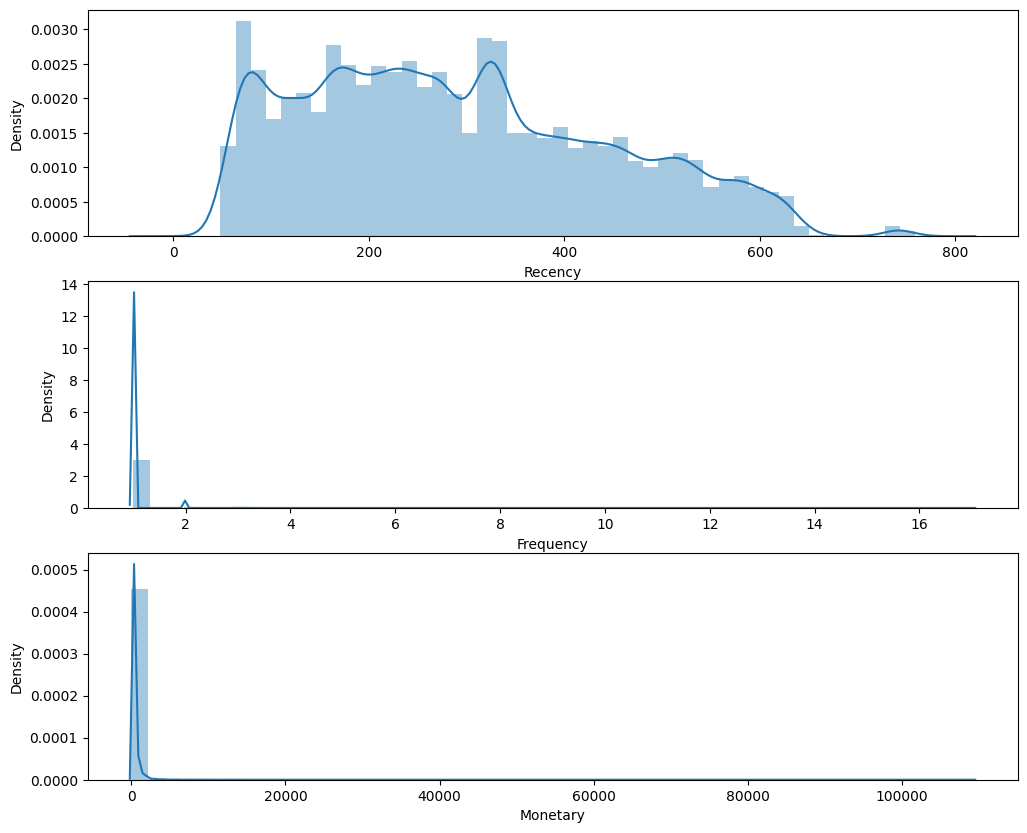

In [1088]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

In [1089]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96095 entries, 0 to 96094
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96095 non-null  object 
 1   Recency             96095 non-null  int64  
 2   Frequency           96095 non-null  int64  
 3   Monetary            96095 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.7+ MB


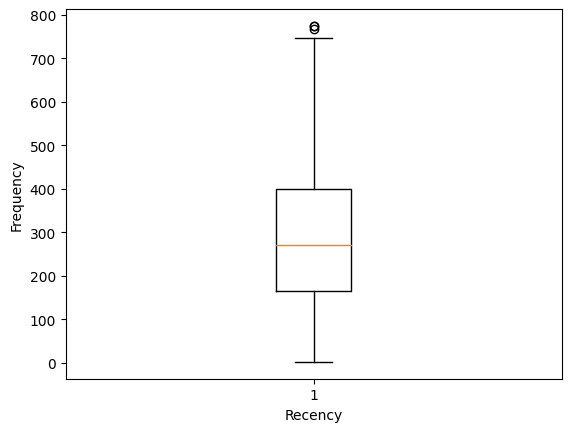

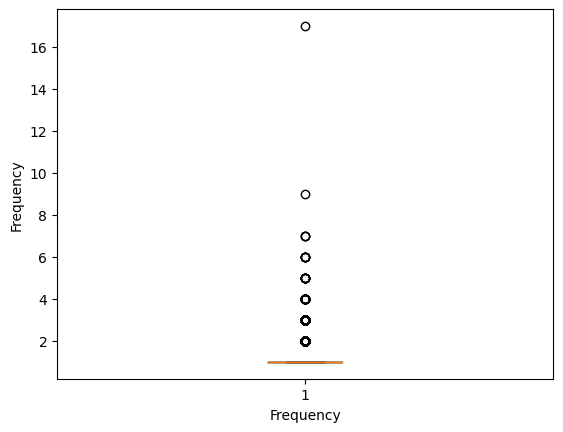

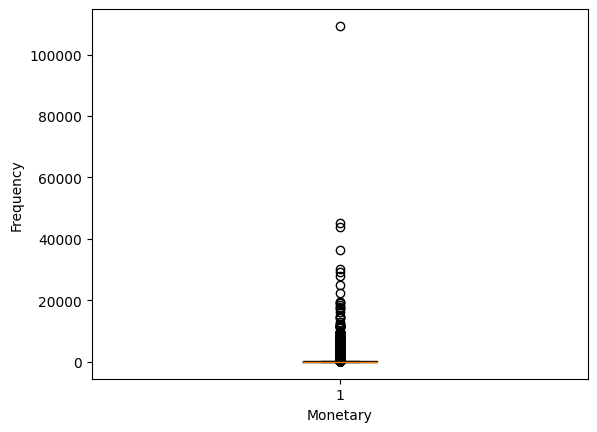

In [1090]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM_df[i])

In [1091]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [1092]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2997
Indexes:  Int64Index([   33,   106,   124,   144,   249,   312,   414,   429,   438,
              448,
            ...
            95533, 95635, 95640, 95708, 95756, 95783, 95809, 95915, 95933,
            96049],
           dtype='int64', length=2997)
****************************************
Number of outliers in Monetary column:  1068
Indexes:  Int64Index([  226,   262,   295,   426,   551,   583,   620,   626,   718,
              767,
            ...
            95718, 95723, 95751, 95805, 95852, 95904, 95925, 95995, 96082,
            96090],
           dtype='int64', length=1068)
****************************************


In [1093]:
RFM_df.shape

(96095, 4)

In [1094]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [1095]:
'''for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*"*40)'''

'for i in ["Recency", "Monetary"]:\n    remove_outlier(RFM_df, i)\n    print("*"*40)'

In [1096]:
RFM_df.shape

(96095, 4)

In [1097]:
RFM_df2= RFM_df.copy()
RFM_df2= RFM_df2.set_index('customer_unique_id')
RFM_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,162,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,165,1,27.19
0000f46a3911fa3c0805444483337064,587,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62
0004aac84e0df4da2b147fca70cf8255,338,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58
ffff371b4d645b6ecea244b27531430a,619,1,112.46


In [1098]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [1099]:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,162,1,141.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,165,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,587,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,338,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,4134.84,1,5,5,155
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58,3,5,2,352
ffff371b4d645b6ecea244b27531430a,619,1,112.46,1,5,3,153


In [1100]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [1101]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,162,1,141.90,4,1,4,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,165,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,587,1,86.22,1,1,2,112,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,338,1,196.89,2,1,4,214,Cannot Lose Them


In [1102]:
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         329.523880  329.0  230  435   6051  1.000992    1.0   
At Risk                438.188961  419.0  320  774  16686  1.045307    1.0   
Cannot Lose Them       488.537046  491.0  320  746   6087  1.060457    1.0   
Champions              135.708326  132.0    2  229   5921  1.214153    1.0   
Hibernating customers  394.086330  378.0  230  774   8676  1.000000    1.0   
Lost customers         527.681006  521.0  436  766   4812  1.001870    1.0   
Loyal                  229.080174  245.0   51  319   6199  1.091628    1.0   
Need Attention         207.789135  229.0   51  319   5909  1.000000    1.0   
New Customers          174.681100  178.0   51  319   5381  1.000000    1.0   
Potential Loyalist     181.666334  182.0    2  319  18045  1.020504    1.0   
Promising              156.922210  144.0   38  319  12328  1.000000    1.0   

                                        Monetary                              \
                      min max  count        mean   median     min        max   
Segment                                                                        
About To Sleep          1   2   6051   52.932253   45.000   10.07     140.08   
At Risk                 1   6  16686  300.541741  163.650   56.09   45256.00   
Cannot Lose Them        1   4   6087  366.884184  204.440   90.16  109312.64   
Champions               1  17   5921  482.473574  270.720  140.15   30186.00   
Hibernating customers   1   1   8676   80.093729   75.625   11.63     140.08   
Lost customers          1   3   4812   45.320919   43.720   12.28      89.93   
Loyal                   1   9   6199  388.729839  236.060   90.18   44048.00   
Need Attention          1   1   5909  272.338585  174.140   90.09   29099.52   
New Customers           1   1   5381   53.549608   51.790    9.59      89.96   
Potential Loyalist      1   3  18045   75.630397   71.150    0.00     140.08   
Promising               1   1  12328  280.725234  165.465    0.00   19174.38   

                              
                       count  
Segment                       
About To Sleep          6051  
At Risk                16686  
Cannot Lose Them        6087  
Champions               5921  
Hibernating customers   8676  
Lost customers          4812  
Loyal                   6199  
Need Attention          5909  
New Customers           5381  
Potential Loyalist     18045  
Promising              12328

In [1103]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         329.523880  329.0  230  435   6051  1.000992    1.0   
At Risk                438.188961  419.0  320  774  16686  1.045307    1.0   
Cannot Lose Them       488.537046  491.0  320  746   6087  1.060457    1.0   
Champions              135.708326  132.0    2  229   5921  1.214153    1.0   
Hibernating customers  394.086330  378.0  230  774   8676  1.000000    1.0   
Lost customers         527.681006  521.0  436  766   4812  1.001870    1.0   
Loyal                  229.080174  245.0   51  319   6199  1.091628    1.0   
Need Attention         207.789135  229.0   51  319   5909  1.000000    1.0   
New Customers          174.681100  178.0   51  319   5381  1.000000    1.0   
Potential Loyalist     181.666334  182.0    2  319  18045  1.020504    1.0   
Promising              156.922210  144.0   38  319  12328  1.000000    1.0   

                                        Monetary                              \
                      min max  count        mean   median     min        max   
Segment                                                                        
About To Sleep          1   2   6051   52.932253   45.000   10.07     140.08   
At Risk                 1   6  16686  300.541741  163.650   56.09   45256.00   
Cannot Lose Them        1   4   6087  366.884184  204.440   90.16  109312.64   
Champions               1  17   5921  482.473574  270.720  140.15   30186.00   
Hibernating customers   1   1   8676   80.093729   75.625   11.63     140.08   
Lost customers          1   3   4812   45.320919   43.720   12.28      89.93   
Loyal                   1   9   6199  388.729839  236.060   90.18   44048.00   
Need Attention          1   1   5909  272.338585  174.140   90.09   29099.52   
New Customers           1   1   5381   53.549608   51.790    9.59      89.96   
Potential Loyalist      1   3  18045   75.630397   71.150    0.00     140.08   
Promising               1   1  12328  280.725234  165.465    0.00   19174.38   

                              Ratio  
                       count         
Segment                              
About To Sleep          6051   6.30  
At Risk                16686  17.36  
Cannot Lose Them        6087   6.33  
Champions               5921   6.16  
Hibernating customers   8676   9.03  
Lost customers          4812   5.01  
Loyal                   6199   6.45  
Need Attention          5909   6.15  
New Customers           5381   5.60  
Potential Loyalist     18045  18.78  
Promising              12328  12.83

<ipython-input-1104-47bf1bc21b29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")


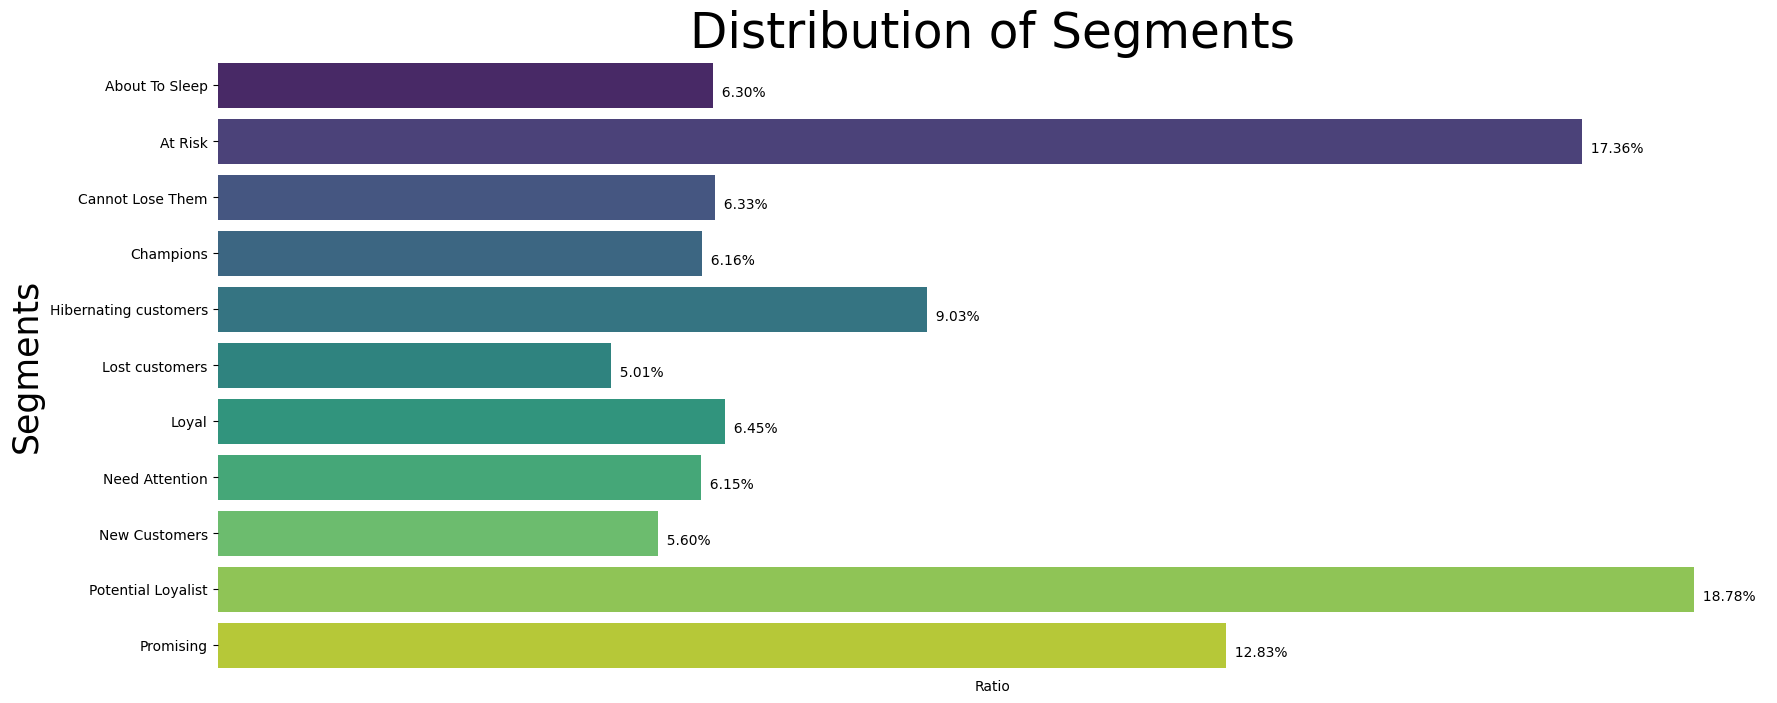

In [1104]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

In [1105]:
RFM_df2.reset_index(inplace=True)
RFM_df2.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,162,1,141.90,4,1,4,414,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,165,1,27.19,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,587,1,86.22,1,1,2,112,Lost customers
3,0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,338,1,196.89,2,1,4,214,Cannot Lose Them


In [1106]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.726853,-46.545746,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.527788,-46.660310,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,Campinas,SP


In [1107]:
df_customers = df_customers.merge(RFM_df2[['customer_unique_id','Segment']],on='customer_unique_id',how='left')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state,Segment
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,Franca,SP,At Risk
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.726853,-46.545746,Sao Bernardo Do Campo,SP,Promising
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.527788,-46.660310,Sao Paulo,SP,Promising
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,Mogi Das Cruzes,SP,Promising
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,Campinas,SP,Promising
...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,-23.587901,-46.501830,Sao Paulo,SP,New Customers
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,-23.612294,-46.765787,Taboao Da Serra,SP,Potential Loyalist
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,-3.744128,-38.510859,Fortaleza,CE,Potential Loyalist
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,-29.956391,-51.167614,Canoas,RS,At Risk


In [1108]:
duplicate = df_customers[df_customers.duplicated(subset='customer_unique_id')].customer_unique_id.tolist()

In [1109]:
df_customers[df_customers['customer_unique_id'].isin(duplicate)].sort_values(by='customer_unique_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state,Segment
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,-13.862728,-40.089642,Jequie,BA,Champions
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,-13.862728,-40.089642,Jequie,BA,Champions
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,-22.758886,-43.435672,Nova Iguacu,RJ,Loyal
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,-22.758886,-43.435672,Nova Iguacu,RJ,Loyal
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,-9.637268,-35.743304,Maceio,AL,Champions
...,...,...,...,...,...,...,...,...
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,-22.486086,-48.547450,Barra Bonita,SP,At Risk
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,-22.486086,-48.547450,Barra Bonita,SP,At Risk
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,-22.486086,-48.547450,Barra Bonita,SP,At Risk
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,-22.843339,-46.320409,Extrema,MG,At Risk


In [1110]:
df_order_header = df_order_header.merge(df_customers[['customer_id','customer_unique_id']],on='customer_id',how='left').drop(columns='customer_id')
df_order_header.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_value,boleto_payment,credit_card_payment,debit_card_payment,not_defined_payment,voucher_payment,review_score,review_comment_message,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,0.0,0.468096,0.0,0.0,0.531904,4.0,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,1.0,0.000000,0.0,0.0,0.000000,4.0,Muito bom o produto.,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,0.0,1.000000,0.0,0.0,0.000000,5.0,NaN,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,0.0,1.000000,0.0,0.0,0.000000,5.0,O produto foi exatamente o que eu esperava e e...,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,0.0,1.000000,0.0,0.0,0.000000,5.0,NaN,72632f0f9dd73dfee390c9b22eb56dd6


In [1111]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [1112]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641,Mogiguacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618,Braganca Paulista,SP


In [1113]:
df_customers.drop(columns='customer_id',inplace=True)
df_customers.head()

,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state,Segment
0,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,Franca,SP,At Risk
1,290c77bc529b7ac935b93aa66c333dc3,9790,-23.726853,-46.545746,Sao Bernardo Do Campo,SP,Promising
2,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.527788,-46.660310,Sao Paulo,SP,Promising
3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,Mogi Das Cruzes,SP,Promising
4,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,Campinas,SP,Promising


In [1149]:
order_header = df_order_header.columns
seller = df_sellers.columns
customers = df_customers.columns
order_details = df_orderitems.columns

In [1114]:
df_unified = df_order_header.merge(df_orderitems,on='order_id',how='left')
df_unified = df_unified.merge(df_sellers,on='seller_id',how='left')
df_unified = df_unified.merge(df_customers,on='customer_unique_id',how='left')

In [1115]:
df_unified.isna().sum()

order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  244
order_delivered_carrier_date      2193
order_delivered_customer_date     3565
order_estimated_delivery_date        0
order_value                          3
boleto_payment                       7
credit_card_payment                  7
debit_card_payment                   7
not_defined_payment                  7
voucher_payment                      7
review_score                      1061
review_comment_message           71353
customer_unique_id                   0
order_item_id                      922
product_id                         922
seller_id                          922
shipping_limit_date                922
price                              922
freight_value                      922
product_category_name_english     2699
seller_zip_code_prefix             922
seller_lat                        1205
seller_lng               

In [1118]:
necessary = ['order_value','boleto_payment','order_item_id','seller_state','customer_state']
df_unified.dropna(subset=necessary,inplace=True)
df_unified.isna().sum()

order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   16
order_delivered_carrier_date      1261
order_delivered_customer_date     2625
order_estimated_delivery_date        0
order_value                          0
boleto_payment                       0
credit_card_payment                  0
debit_card_payment                   0
not_defined_payment                  0
voucher_payment                      0
review_score                      1038
review_comment_message           70663
customer_unique_id                   0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name_english     1770
seller_zip_code_prefix               0
seller_lat                           0
seller_lng               

In [1137]:
acceptance = 0
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    if text == '':
      return 0
    if polarity > acceptance:
        return 1
    elif polarity < -acceptance:
        return -1
    else:
        return 0

df_unified['review_comment_message'].fillna('',inplace=True)
df_unified['sentiment_analysis'] = df_unified['review_comment_message'].apply(analyze_sentiment)

<Axes: xlabel='sentiment_analysis', ylabel='count'>

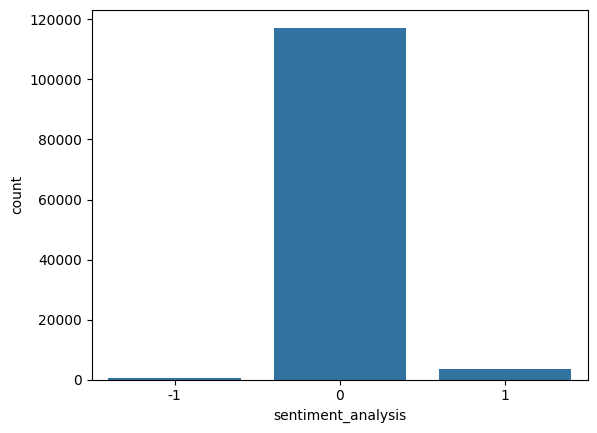

In [1138]:
sns.countplot(df_unified,x='sentiment_analysis')

In [1139]:
df_unified.drop(columns='review_comment_message',inplace=True)

In [1140]:
df_unified.shape

(121500, 34)

In [1141]:
print(df_order_header.shape)
print(df_sellers.shape)
print(df_customers.shape)
print(df_orderitems.shape)

(99441, 16)
(3095, 6)
(99441, 7)
(112650, 8)


In [1150]:
order_header = order_header.delete(order_header.get_loc('review_comment_message'))
order_header = order_header.append(pd.Index(['sentiment_analysis']))
order_header

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value', 'boleto_payment', 'credit_card_payment',
       'debit_card_payment', 'not_defined_payment', 'voucher_payment',
       'review_score', 'customer_unique_id', 'sentiment_analysis'],
      dtype='object')

In [1151]:
df_sellers = df_unified[seller].drop_duplicates()
df_order_detail = df_unified[order_details].drop_duplicates()
df_order_header = df_unified[order_header].drop_duplicates()
df_customers = df_unified[customers].drop_duplicates()

In [1152]:
print(df_order_header.shape)
print(df_sellers.shape)
print(df_customers.shape)
print(df_order_detail.shape)

(98178, 16)
(3088, 6)
(95206, 7)
(112096, 8)


In [1155]:
df_sellers.to_parquet('/content/drive/MyDrive/Olist - Personal Project/ETL/df_sellers.parquet')
df_order_detail.to_parquet('/content/drive/MyDrive/Olist - Personal Project/ETL/df_order_detail.parquet')
df_order_header.to_parquet('/content/drive/MyDrive/Olist - Personal Project/ETL/df_order_header.parquet')
df_customers.to_parquet('/content/drive/MyDrive/Olist - Personal Project/ETL/df_customers.parquet')

In [1160]:
from google.cloud import storage
import os

# Rutas locales de los archivos a cargar
rutas_locales = [
    '/content/drive/MyDrive/Olist - Personal Project/ETL/df_sellers.parquet',
    '/content/drive/MyDrive/Olist - Personal Project/ETL/df_order_detail.parquet',
    '/content/drive/MyDrive/Olist - Personal Project/ETL/df_order_header.parquet',
    '/content/drive/MyDrive/Olist - Personal Project/ETL/df_customers.parquet'
]

# Nombre del bucket en GCS
nombre_bucket = 'olist-project'

# Ruta del archivo JSON de credenciales
ruta_json_credenciales = "/content/olist-project-414920-ca53816de774.json"

# Crear el cliente de GCS utilizando las credenciales del archivo JSON
client = storage.Client.from_service_account_json(ruta_json_credenciales)

# Iterar sobre los archivos en las rutas locales
for ruta_local in rutas_locales:
    try:
        # Obtener el nombre del archivo
        nombre_archivo = os.path.basename(ruta_local)

        # Obtener el bucket
        bucket = client.get_bucket(nombre_bucket)

        # Crear un blob y cargar el archivo en GCS
        blob = bucket.blob(nombre_archivo)
        blob.upload_from_filename(ruta_local)

        print(f'Se cargó {nombre_archivo} a GCS')
    except Exception as e:
        print(f'Ocurrió un error al cargar {nombre_archivo} a GCS: {str(e)}')

Se cargó df_sellers.parquet a GCS
Se cargó df_order_detail.parquet a GCS
Se cargó df_order_header.parquet a GCS
Se cargó df_customers.parquet a GCS
